In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [2]:
def gini_impurity(column):
    impurity = 1
    counters = Counter(column)
    for value in column.unique():
        impurity -= (counters[value] / len(column)) ** 2

    return impurity

In [4]:

data = pd.read_csv('features.csv',usecols=['churn_yn','longest_time_between_events', 'event_num', 'enterworld_num', 'levelup_num', 'spendmoney_num', 'itemupgrade_successrate', 'sessions_num'])
data = data.dropna()
#data['survival_time'] = data['survival_time'].str.replace(r'\+', '', regex=True).astype('int')
data

#data=data.iloc[:500]

,churn_yn,event_num,enterworld_num,levelup_num,spendmoney_num,itemupgrade_successrate,longest_time_between_events,sessions_num
1,0.0,39385.0,193.0,5.0,1358.0,0.00,253529.85,167.0
2,0.0,37423.0,176.0,19.0,907.0,0.00,436143.07,152.0
3,0.0,33900.0,102.0,74.0,540.0,0.00,458000.84,87.0
4,0.0,49063.0,237.0,0.0,470.0,0.00,161775.37,187.0
5,1.0,4608.0,28.0,0.0,190.0,0.00,1280471.93,28.0
...,...,...,...,...,...,...,...,...
4015,1.0,37206.0,176.0,39.0,2114.0,0.00,332403.55,176.0
4016,1.0,4932.0,6.0,5.0,44.0,0.00,454534.61,7.0
4017,0.0,28439.0,122.0,106.0,934.0,0.00,412474.64,123.0
4018,0.0,103938.0,894.0,6.0,3120.0,0.00,70476.16,771.0


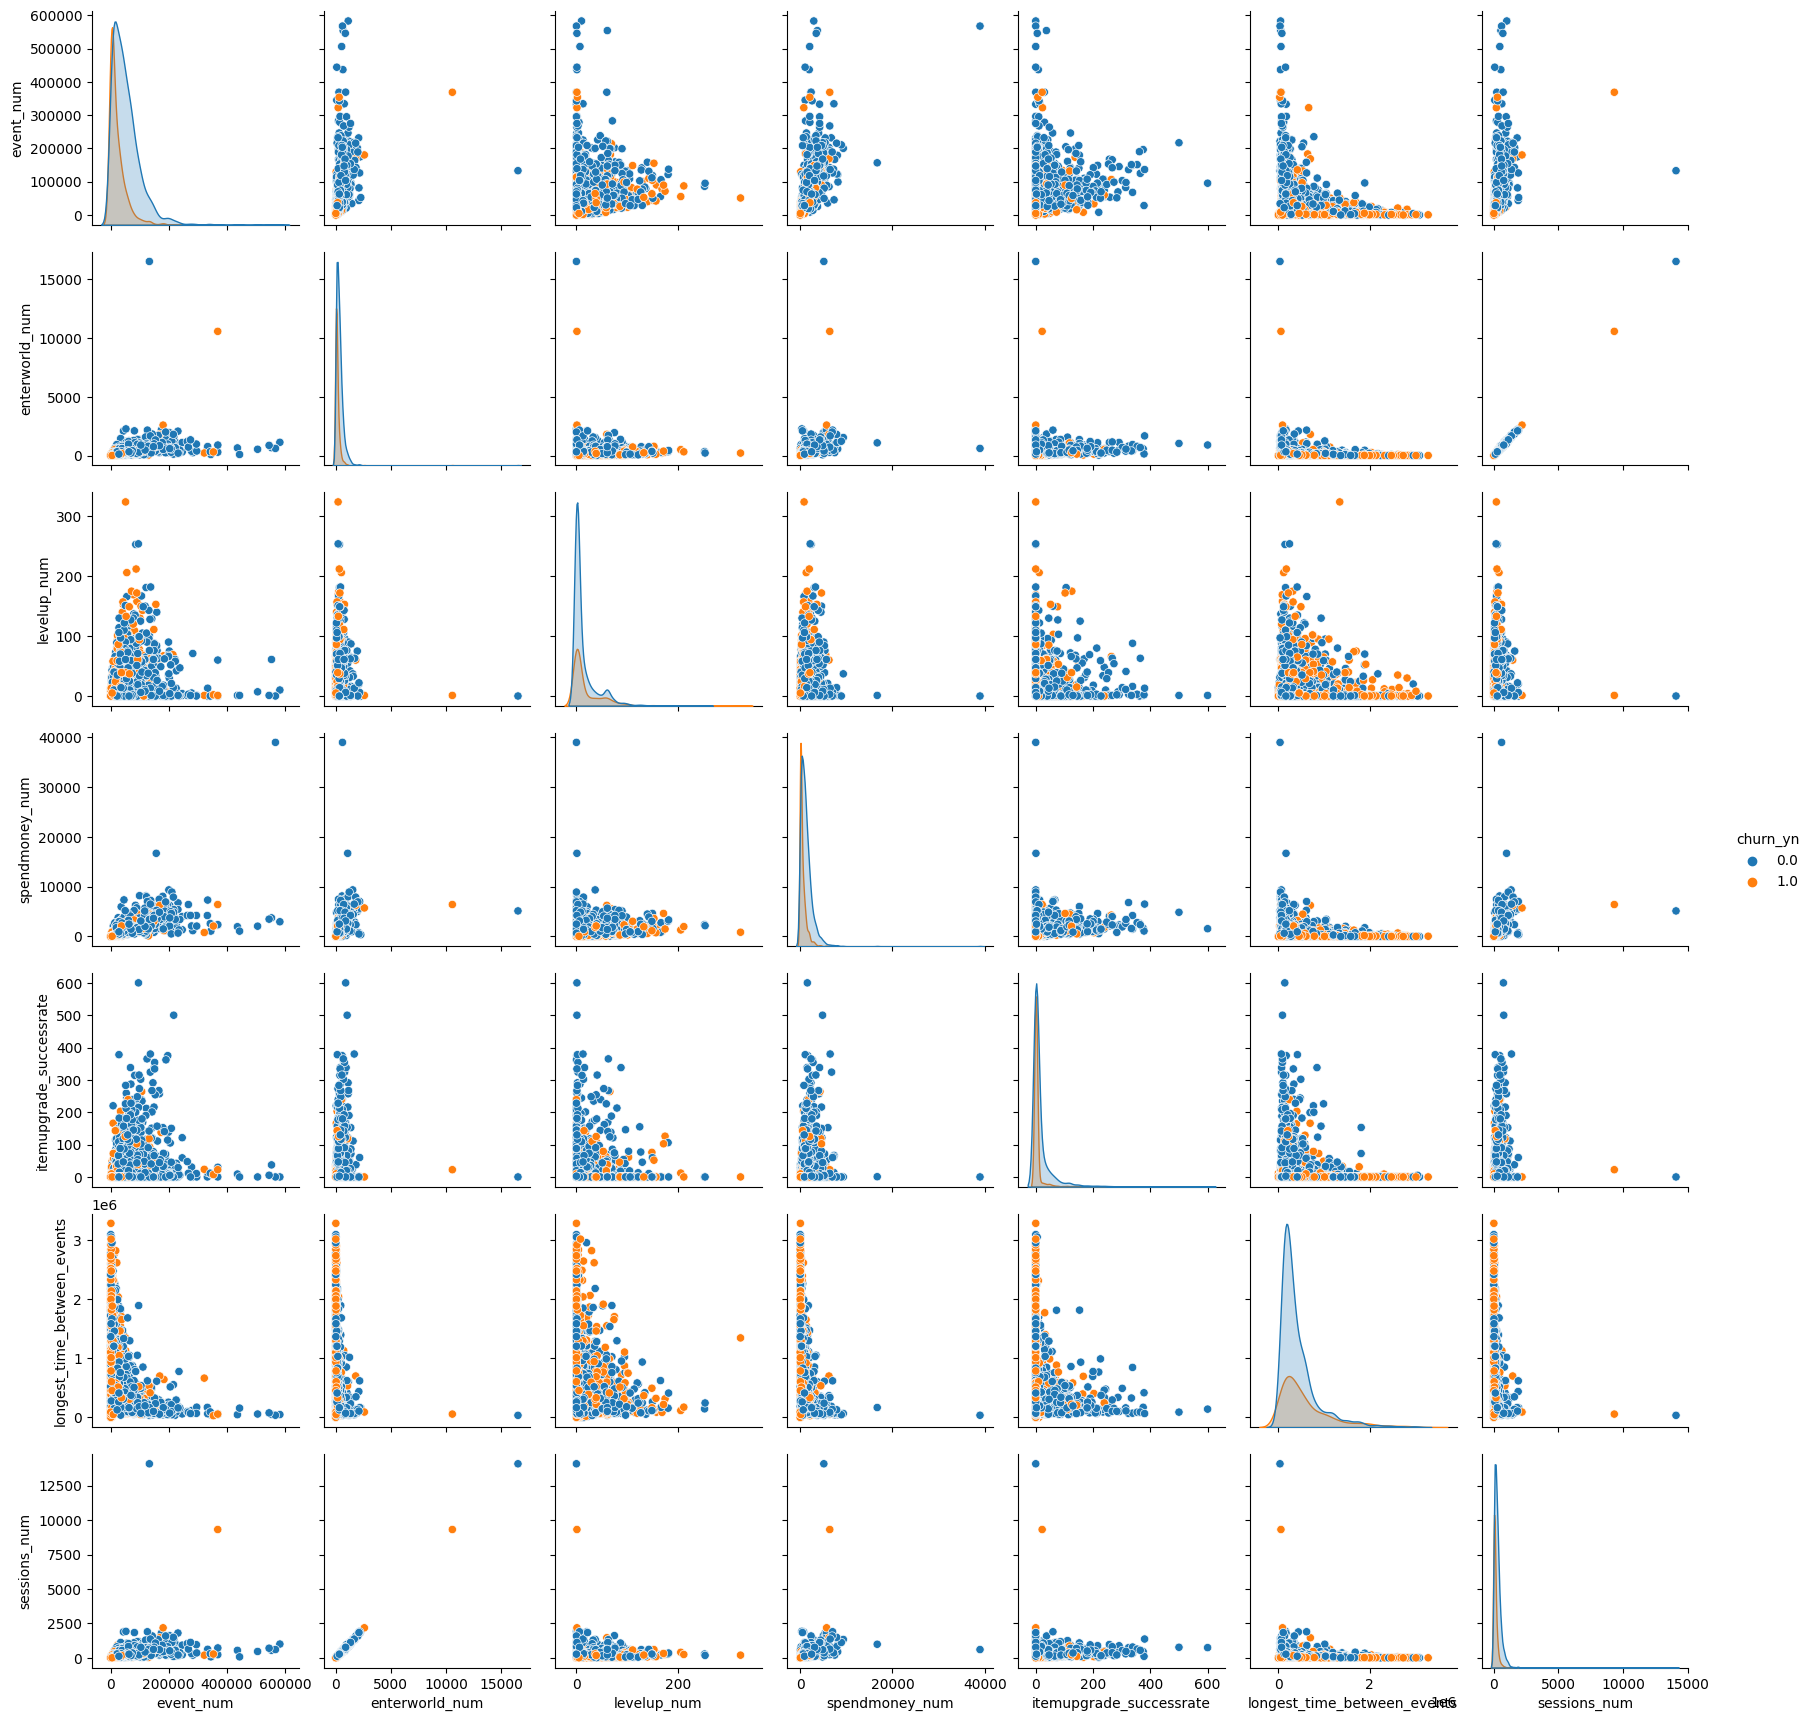

In [49]:

sns.pairplot(data=data, hue='churn_yn')
plt.show()

In [5]:

X = data.copy()
y = X.pop('churn_yn')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [54]:

clf = DecisionTreeClassifier(criterion='gini', 
    splitter='best', 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=10, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=10)

In [55]:
predictions = clf.predict(X_test)
print(predictions[:10])

[0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]


In [56]:
print(accuracy_score(y_test, predictions))

0.7587939698492462


[Text(0.5, 0.9166666666666666, 'X[1] <= 49.5\ngini = 0.419\nsamples = 2985\nvalue = [2093, 892]'),
 Text(0.25, 0.75, 'X[5] <= 533804.469\ngini = 0.47\nsamples = 746\nvalue = [282, 464]'),
 Text(0.125, 0.5833333333333334, 'X[3] <= 36.5\ngini = 0.396\nsamples = 356\nvalue = [97, 259]'),
 Text(0.0625, 0.4166666666666667, 'X[2] <= 0.5\ngini = 0.312\nsamples = 181\nvalue = [35, 146]'),
 Text(0.03125, 0.25, 'X[5] <= 153.49\ngini = 0.263\nsamples = 141\nvalue = [22, 119]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.294\nsamples = 123\nvalue = [22, 101]'),
 Text(0.09375, 0.25, 'X[3] <= 21.5\ngini = 0.439\nsamples = 40\nvalue = [13, 27]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.1875, 0.4166666666666667, 'X[2] <= 1.5\ngini = 0.458\nsamples = 175\nvalue = [62, 113]'),
 Text(

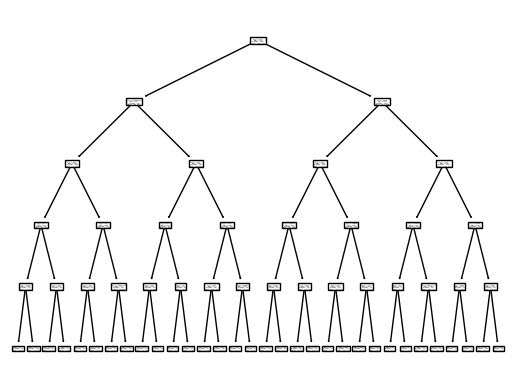

In [57]:
tree.plot_tree(clf)

## Voting Classifier

To make this section work, make sure to run the first import section from this notebook on top. <br>
*This is a playfield for the voting classifier, results and script may change at any given point.*

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('features.csv')
#usecols=['churn_yn','longest_time_between_events', 'event_num', 'enterworld_num', 'levelup_num', 'spendmoney_num', 'itemupgrade_successrate', 'sessions_num'])
data = data.dropna()
data = data.drop(['actor_account_id','survival_time'],axis=1)
data = data.drop(columns=data.columns[0],axis=1)
data

,churn_yn,event_num,enterworld_num,levelup_num,joinparty_num,spendmoney_num,duel_num,duel_kd,partybattle_num,completechallengetoday_num,...,guildlevelup_num,level_min,level_max,class,longest_time_between_events,faction1,faction2,targetaccountid_num,sessions_num,has_smurf_yn
1,0.0,39385.0,193.0,5.0,176.0,1358.0,34.0,0.79,37.0,12.0,...,0.0,15.0,50.0,3.0,253529.85,2.0,0.0,170.0,167.0,1.0
2,0.0,37423.0,176.0,19.0,148.0,907.0,10.0,2.33,0.0,12.0,...,0.0,1.0,50.0,9.0,436143.07,1.0,0.0,30.0,152.0,1.0
3,0.0,33900.0,102.0,74.0,104.0,540.0,5.0,0.67,4.0,2.0,...,0.0,1.0,50.0,3.0,458000.84,1.0,0.0,33.0,87.0,1.0
4,0.0,49063.0,237.0,0.0,273.0,470.0,0.0,0.00,0.0,36.0,...,0.0,50.0,50.0,3.0,161775.37,2.0,0.0,123.0,187.0,0.0
5,1.0,4608.0,28.0,0.0,12.0,190.0,0.0,0.00,0.0,2.0,...,0.0,39.0,50.0,2.0,1280471.93,2.0,0.0,5.0,28.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,1.0,37206.0,176.0,39.0,54.0,2114.0,0.0,0.00,0.0,0.0,...,0.0,23.0,50.0,9.0,332403.55,1.0,0.0,34.0,176.0,1.0
4016,1.0,4932.0,6.0,5.0,0.0,44.0,0.0,0.00,0.0,0.0,...,0.0,50.0,50.0,3.0,454534.61,1.0,0.0,5.0,7.0,1.0
4017,0.0,28439.0,122.0,106.0,4.0,934.0,0.0,0.00,0.0,0.0,...,0.0,1.0,50.0,1.0,412474.64,2.0,0.0,10.0,123.0,1.0
4018,0.0,103938.0,894.0,6.0,410.0,3120.0,0.0,0.00,0.0,65.0,...,0.0,50.0,50.0,3.0,70476.16,2.0,0.0,115.0,771.0,1.0


In [6]:
X = data.copy()
y = X.pop('churn_yn')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [9]:
clf1 = LogisticRegression(max_iter=100,solver='newton-cg') #newton_cg works best, even with error, sag/saga comes 2nd
clf2 = RandomForestClassifier(n_estimators=22) #?
clf3 = GaussianNB() #Makes everything worse for now
clf4 = SVC(probability=True) #?
clf5 = DecisionTreeClassifier(criterion='gini', 
    splitter='best', 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=22, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0) #Still gives back the best classification, theres a s small accuracy boost when voting with logistic regression, both must hoever overwerite the random forrest and the SVC classifier
eclf = VotingClassifier(estimators=[('LR', clf1),
                                    ('RF', clf2),#('GaussianNB', clf3), 
                                    ('SVC', clf4),('DCTree', clf5)],
                                    voting='soft', weights=[2,1,1,2])

eclf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('LR', LogisticRegression(solver='newton-cg')),
                             ('RF', RandomForestClassifier(n_estimators=22)),
                             ('SVC', SVC(probability=True)),
                             ('DCTree',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features=22))],
                 voting='soft', weights=[2, 1, 1, 2])

In [10]:
print(eclf)

VotingClassifier(estimators=[('LR', LogisticRegression(solver='newton-cg')),
                             ('RF', RandomForestClassifier(n_estimators=22)),
                             ('SVC', SVC(probability=True)),
                             ('DCTree',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features=22))],
                 voting='soft', weights=[2, 1, 1, 2])


In [11]:
predictions = eclf.predict(X_test)
print(predictions[:10])

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


In [12]:
print(accuracy_score(y_test, predictions))

0.7648241206030151


### Best aaccuracy_score yet
0.7648241206030151 best result yet from the voting classifier, still somewhat meager, done with all features from the dataset except surival time

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'tensorflow'